In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import molsysmt as msm
from molsysmt import pyunitwizard as puw
import numpy as np
import matplotlib.pyplot as plt

# Get least RMSD

Lets load a small molecular system with a 5000 frames trajectory to show how MolSysMT gets the least RMSD over a reference frame.

In [3]:
h5_file = msm.systems['pentalanine']['traj_pentalanine.h5']
molecular_system = msm.convert(h5_file)

In [4]:
msm.info(molecular_system)

form,n_atoms,n_groups,n_components,n_chains,n_molecules,n_entities,n_peptides,n_structures
molsysmt.MolSys,62,7,1,1,1,1,1,5000


In [5]:
time = msm.get(molecular_system, element='system', time=True)

## Least RMSD

The RMSD value is not an observable that depends only on the internal geometry of a molecular system. A molecular system can have a frozen geometry but suffering translations or rotations relative to the reference the RMSD varies. Given this frozen geometry and the reference there exist a unique translation and rotation that, combined, minimizes the RMSD. If we want to use the RMSD as a metric to characterize how far two peptide or protein conformations are, the translation and rotation that makes the rmsd minimal needs to be found. Thereby, MolSysMT implements the algorithm proposed by Coutsias, Evangelos A., Chaok Seok, and Ken A. Dill in their work "Using quaternions to calculate RMSD" [[1](#Coutsias2004)] to obtained the least RMSD. The algorithm is implemented behind the method `molsysmt.least_rmsd()` with the same input arguments as `molsysmt.rmsd()`. Let's see the comparison of both methods when the observables are obtained for every frame of a trajectory with respect to the same reference:

In [6]:
lrmsd = msm.structure.get_least_rmsd(molecular_system, selection='backbone', structure_indices='all', reference_structure_index=0)
rmsd = msm.structure.get_rmsd(molecular_system, selection='backbone', structure_indices='all', reference_structure_index=0)

/home/diego/Myopt/miniconda3/envs/MolSysMT@uibcdf_3.12/lib/python3.12/site-packages/matplotlib/cbook.py:1345: UnitStrippedWarning: The unit of the quantity is stripped when downcasting to ndarray.
  return np.asarray(x, float)


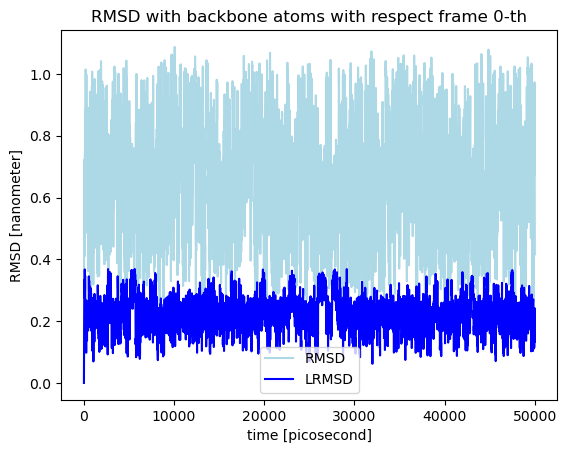

In [7]:
plt.plot(time, rmsd, color='lightblue', label='RMSD')
plt.plot(time, lrmsd, color='blue', label='LRMSD')
plt.xlabel('time [{}]'.format(puw.get_unit(time)))
plt.ylabel('RMSD [{}]'.format(puw.get_unit(rmsd)))
plt.title('RMSD with backbone atoms with respect frame 0-th')
plt.legend()
plt.show()

------------

<a id='Coutsias2004'>[1]</a>  [Coutsias, Evangelos A., Chaok Seok, and Ken A. Dill. "Using quaternions to calculate RMSD." Journal of computational chemistry 25, no. 15 (2004): 1849-1857](https://doi.org/10.1002/jcc.20110)